In [10]:
import torch
import numpy as np
import pandas as pd
from tqdm import trange
import matplotlib.pyplot as plt

In [11]:
def get_xor_data():
    x = torch.tensor([[1, 1], [0, 0], [0, 1], [1, 0]], dtype=torch.float32)
    y = torch.tensor([1, 1, 0, 0], dtype=torch.float32)
    return x, y


def get_2_layer_model():
    return torch.nn.Sequential(
        torch.nn.Linear(2, 2), torch.nn.Sigmoid(),
        torch.nn.Linear(2, 1), torch.nn.Sigmoid(),
        torch.nn.Flatten(0, 1)
    )

In [12]:
x_train, y_train = get_xor_data()

n_epochs = 1500
batch_sizes = [1, 2, 3, 4]

loss_history = pd.DataFrame(
    index=range(n_epochs), dtype=float,
    columns=batch_sizes
)

  3%|█                                      | 42/1500 [00:00<00:03, 408.86it/s]

4


 15%|█████▌                               | 226/1500 [00:00<00:01, 1134.07it/s]

2


 13%|████▉                                 | 193/1500 [00:00<00:01, 974.22it/s]

2


 23%|████████▋                            | 352/1500 [00:00<00:00, 1756.26it/s]

1


100%|████████████████████████████████████| 1500/1500 [00:00<00:00, 1605.93it/s]


<AxesSubplot:>

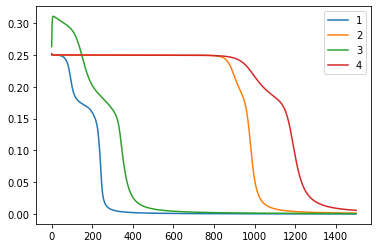

In [5]:
for batch_size in batch_sizes:
    _ = torch.manual_seed(1)
    loss_fn = torch.nn.MSELoss(reduction='mean')
    model = get_2_layer_model()
    optimizer = torch.optim.SGD(model.parameters(), lr=2.0)
    n_batches = int(np.ceil(len(x_train) / batch_size))
    print(n_batches)

    for epoch_no in trange(n_epochs):
        for batch_no in range(n_batches):
            # Get batch
            batch_idxs = slice(batch_no * batch_size, (batch_no + 1) * batch_size)
            x_batch = x_train[batch_idxs]
            y_batch = y_train[batch_idxs]

            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            pred_train = model(x_train)
            loss_history.loc[epoch_no, batch_size] = loss_fn(pred_train, y_train).item()

loss_history.plot()

  3%|█▏                                     | 48/1500 [00:00<00:03, 474.13it/s]

4


  7%|██▌                                    | 99/1500 [00:00<00:01, 982.83it/s]

2


  7%|██▋                                  | 111/1500 [00:00<00:01, 1101.96it/s]

2


 13%|████▋                                | 189/1500 [00:00<00:00, 1885.14it/s]

1


100%|████████████████████████████████████| 1500/1500 [00:00<00:00, 1853.31it/s]


<AxesSubplot:>

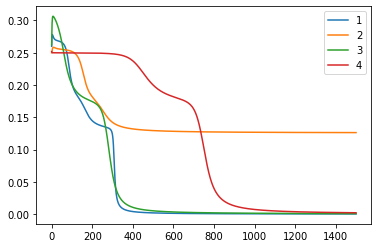

In [13]:
for batch_size in batch_sizes:
    _ = torch.manual_seed(1)
    loss_fn = torch.nn.MSELoss(reduction='mean')
    model = get_2_layer_model()
    optimizer = torch.optim.SGD(model.parameters(), lr=2.0)
    n_batches = int(np.ceil(len(x_train) / batch_size))
    print(n_batches)

    for epoch_no in trange(n_epochs):
        for batch_no in range(n_batches):
            # Get batch
            batch_idxs = slice(batch_no * batch_size, (batch_no + 1) * batch_size)
            x_batch = x_train[batch_idxs]
            y_batch = y_train[batch_idxs]

            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            pred_train = model(x_train)
            loss_history.loc[epoch_no, batch_size] = loss_fn(pred_train, y_train).item()

loss_history.plot()